<a href="https://www.kaggle.com/code/hunhun2211/food-detect?scriptVersionId=96099607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os



In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/foodvn/Food',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/foodvn/Food',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1398 images belonging to 10 classes.
Found 345 images belonging to 10 classes.


In [3]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'Banh chung': 0,
 'Banh mi': 1,
 'Bun dau mam tom': 2,
 'Bun thit nuong': 3,
 'Ca kho to': 4,
 'Canh chua': 5,
 'Chao long': 6,
 'Com tam': 7,
 'Goi cuon': 8,
 'Pho': 9}

In [4]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong


In [5]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-05-20 07:51:02.656728: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 07:51:02.754806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 07:51:02.755723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-20 07:51:02.757018: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-05-20 07:51:05.504919: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-20 07:51:07.197257: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


140/140 [==============================] - 49s 301ms/step - loss: 2.3122 - accuracy: 0.1452 - val_loss: 2.2437 - val_accuracy: 0.1971
Epoch 2/50
140/140 [==============================] - 33s 236ms/step - loss: 2.1842 - accuracy: 0.2096 - val_loss: 2.0735 - val_accuracy: 0.2377
Epoch 3/50
140/140 [==============================] - 32s 230ms/step - loss: 2.0837 - accuracy: 0.2546 - val_loss: 2.0180 - val_accuracy: 0.2609
Epoch 4/50
140/140 [==============================] - 32s 231ms/step - loss: 2.0260 - accuracy: 0.2690 - val_loss: 1.9789 - val_accuracy: 0.2754
Epoch 5/50
140/140 [==============================] - 33s 234ms/step - loss: 1.9332 - accuracy: 0.3197 - val_loss: 1.8699 - val_accuracy: 0.3275
Epoch 6/50
140/140 [==============================] - 35s 248ms/step - loss: 1.7695 - accuracy: 0.4020 - val_loss: 1.8672 - val_accuracy: 0.3362
Epoch 7/50
140/140 [==============================] - 35s 251ms/step - loss: 1.5861 - accuracy: 0.4564 - val_loss: 1.8310 - val_accuracy: 0.3

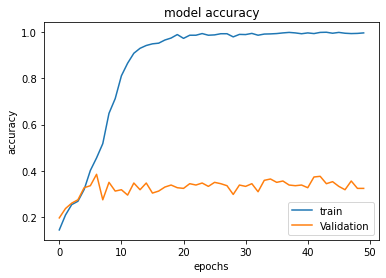

In [9]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  4.6315083503723145
Độ chính xác  0.32463768124580383


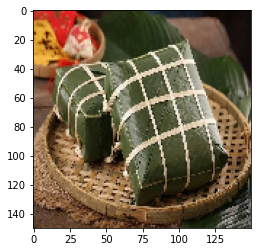

banh chung


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/test-food/banhchung.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("banh chung")
if(kq==1):
    print("Banh mi")
if(kq==2):
    print("Bun dau mam tom")
if(kq==3):
    print("Bun thit nuong")
if(kq==4):
    print("Ca kho to")
if(kq==5):
    print("Canh chua")
if(kq==6):
    print("Chao long")
if(kq==7):
    print("Com tam")
if(kq==8):
    print("Goi cuon")
if(kq==9):
    print("Pho")

